In [70]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVR
from datetime import datetime
import warnings  
warnings.filterwarnings('ignore')


%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = pd.read_csv('data_after_selection.csv')
df['Date'] = pd.to_datetime (df['Date']) 
df = df.set_index('Date')
df.head(3)

,Current1_Ah,Current2_Ah,Current3_Ah,Total_Ah,Power_kW,Holiday,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,Power-1
Date,,,,,,,,,,,,,
2017-01-01 01:00:00,175.629,196.974,21.183,393.785,75.173556,1,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,74.897706
2017-01-01 02:00:00,172.005,196.694,20.030,388.728,74.208175,1,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,75.173556
2017-01-01 03:00:00,175.498,193.354,17.403,386.254,73.735889,1,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,74.208175


In [35]:
def split_data(df,y):
    '''
    split data into train and test sets
    
    '''
    test_idxs = int(df.shape[0]*0.75)
    
    X_test = df.iloc[test_idxs:]
    y_test = y[test_idxs:]
    
    X_train = df.iloc[:test_idxs]
    y_train = y[:test_idxs]
    
    return (X_train,y_train,X_test,y_test)

def evaluation_rmse(y_test, y_pred):
    result = mean_squared_error(y_test, y_pred)
    result = sqrt(result)
    return result


# REGRESSION MODEL
### 1.1 Split data into training and test sets

In [60]:
X=df.values
print(df.columns)

Y=X[:,4]
X=X[:,[5,6,12]] 

Index(['Current1_Ah', 'Current2_Ah', 'Current3_Ah', 'Total_Ah', 'Power_kW',
       'Holiday', 'temp_C', 'HR', 'windSpeed_m/s', 'windGust_m/s', 'pres_mbar',
       'solarRad_W/m2', 'Power-1'],
      dtype='object')


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)
print(X_train)
print(y_train)

[[  0.          16.035       83.2360271 ]
 [  0.          14.39666667 118.9982786 ]
 [  0.          14.40666667 112.1911664 ]
 ...
 [  0.          13.16083333  78.4730721 ]
 [  0.          11.53166667 114.1112386 ]
 [  0.          16.98583333  60.9421524 ]]
[ 80.7510818 122.5047298 102.9004452 ...  83.9299486 107.1727872
  60.0174328]


In [62]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
# make predictions
y_pred_LR = linear_regressor.predict(X_test)

rmse = evaluation_rmse(y_test, y_pred_LR)

print("Model performance: ", rmse)

Model performance:  16.696735526933455


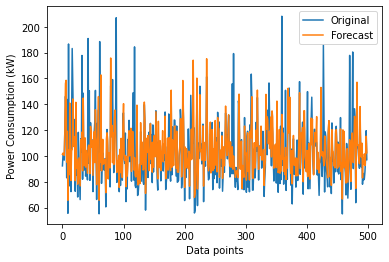

Text(0, 0.5, 'Predicted Power Consumption (kW)')

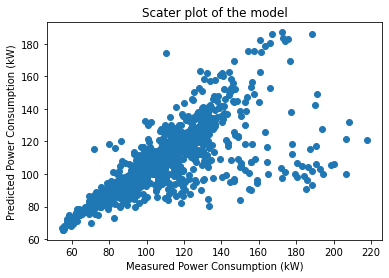

In [63]:
#plot
plt.plot(y_test[1:500] , label = 'Original')
plt.plot(y_pred_LR[1:500] , label = 'Forecast')
plt.xlabel('Data points')
plt.ylabel('Power Consumption (kW)')
plt.legend()
plt.show()

plt.scatter(y_test,y_pred_LR)
plt.title('Scater plot of the model')
plt.xlabel('Measured Power Consumption (kW)')
plt.ylabel('Predicted Power Consumption (kW)')


### 1.2 Regression Decision Trees


In [67]:
# Create Regression Decision Tree object
decision_regressor = DecisionTreeRegressor()

# Train the model using the training sets
decision_regressor.fit(X_train,y_train)

# Make predictions using the testing set
y_pred_DR = decision_regressor.predict(X_test)

rmse = evaluation_rmse(y_test, y_pred_DR)

print("Model performance: ", rmse)


Model performance:  23.555487032466196


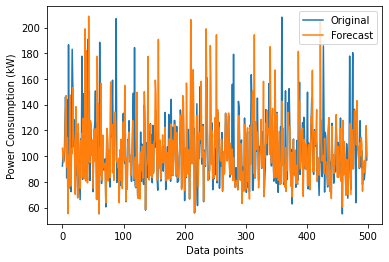

Text(0, 0.5, 'Predicted Power Consumption (kW)')

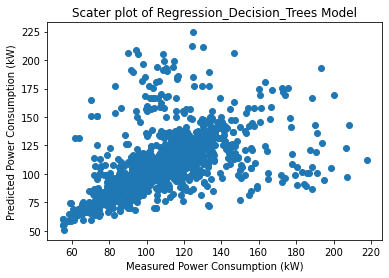

In [68]:
#plot
plt.plot(y_test[1:500] , label = 'Original')
plt.plot(y_pred_DR[1:500] , label = 'Forecast')
plt.xlabel('Data points')
plt.ylabel('Power Consumption (kW)')
plt.legend()
plt.show()

plt.scatter(y_test,y_pred_DR)
plt.title('Scater plot of Regression_Decision_Trees Model')
plt.xlabel('Measured Power Consumption (kW)')
plt.ylabel('Predicted Power Consumption (kW)')

### 1.3 Suport Vector Machine

In [75]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

regr = SVR(kernel='rbf')
regr.fit(X_train,y_train)

y_pred_SVR = regr.predict(sc_X.fit_transform(X_test))
y_test_SVR=sc_y.fit_transform(y_test.reshape(-1,1))
y_pred_SVR2=sc_y.inverse_transform(y_pred_SVR)

rmse = evaluation_rmse(y_test, y_pred_SVR2)

print("Model performance: ", rmse)

Model performance:  16.683691450618326


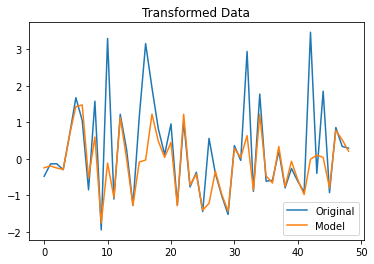

Text(0.5, 1.0, 'Real Data')

In [ ]:
plt.plot(y_test_SVR[1:50],label = 'Original')
plt.plot(y_pred_SVR[1:50], label = 'Model')
plt.legend()
plt.title("Transformed Data")
plt.show()

plt.plot(y_test[1:50], label = 'Original')
plt.plot(y_pred_SVR2[1:50], label = 'Model')
plt.legend()
plt.title("Real Data")